### Análise da exclusão Digital entre 2019 até 2024

Arquivo de 2019 carregado com sucesso.
Arquivo de 2020 carregado com sucesso.
Arquivo de 2021 carregado com sucesso.
Arquivo de 2022 carregado com sucesso.
Arquivo de 2023 carregado com sucesso.
Arquivo de 2024 carregado com sucesso.

--- Evolução da Taxa de Exclusão Digital (2019-2024) ---
 Ano  Taxa de Exclusão (%)
2019             28.364682
2020             13.918526
2021             23.860117
2022             23.834874
2023             21.499906
2024             19.261151

Gráfico da evolução salvo como 'evolucao_exclusao_digital_2019_2024.png'.


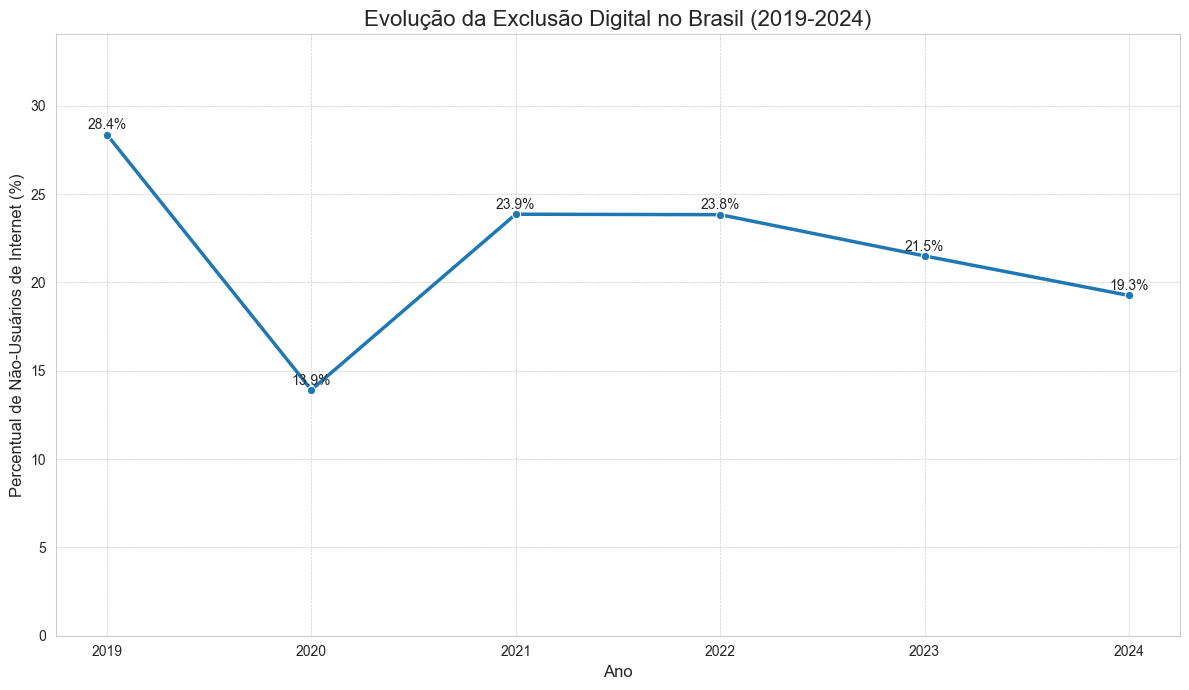

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dicionário mapeando os nomes dos arquivos para os anos correspondentes
arquivos_anos_dicionario = {
    2019: 'dados/ticdom_2019_individuos_base_de_microdados_v1.1.csv',
    2020: 'dados/tic_domicilios_2020_individuos_base_de_microdados_v1.0.csv',
    2021: 'dados/tic_domicilios_2021_individuos_base_de_microdados_v1.0.csv',
    2022: 'dados/tic_domicilios_2022_individuos_base_de_microdados_v1.0.csv',
    2023: 'dados/tic_domicilios_2023_individuos_base_de_microdados_v1.0.csv',
    2024: 'dados/tic_domicilios_2024_individuos_base_de_microdados_v1.0.csv'
}
# --------------------------------------------------------------
# Carregar e processar os dados
arquivos_anos = {
    'dados/ticdom_2019_individuos_base_de_microdados_v1.1.csv': 2019,
    'dados/tic_domicilios_2020_individuos_base_de_microdados_v1.0.csv': 2020,
    'dados/tic_domicilios_2021_individuos_base_de_microdados_v1.0.csv': 2021,
    'dados/tic_domicilios_2022_individuos_base_de_microdados_v1.0.csv': 2022,
    'dados/tic_domicilios_2023_individuos_base_de_microdados_v1.0.csv': 2023,
    'dados/tic_domicilios_2024_individuos_base_de_microdados_v1.0.csv': 2024
}

lista_dfs = []

# Loop para carregar, processar e adicionar cada arquivo a uma lista
for arquivo, ano in arquivos_anos.items():
    try:
        # Carregar apenas a coluna C1 para economizar memória
        df_ano = pd.read_csv(arquivo, sep=';', usecols=['C1'])
        
        # Adicionar a coluna 'Ano'
        df_ano['Ano'] = ano
        
        # Adicionar o dataframe processado à lista
        lista_dfs.append(df_ano)
        print(f"Arquivo de {ano} carregado com sucesso.")
    except Exception as e:
        print(f"Erro ao carregar o arquivo de {ano}: {e}")

# Concatenar todos os dataframes da lista em um só
df_consolidado = pd.concat(lista_dfs, ignore_index=True)

# Limpar os dados, mantendo apenas respostas 0 (Não) e 1 (Sim)
df_consolidado = df_consolidado[df_consolidado['C1'].isin([0, 1])]

# Calcular a taxa de exclusão (proporção de C1 == 0) para cada ano
taxa_exclusao_anual = df_consolidado.groupby('Ano')['C1'].apply(lambda x: (x == 0).sum() / len(x) * 100)
taxa_exclusao_anual = taxa_exclusao_anual.reset_index(name='Taxa de Exclusão (%)')

print("\n--- Evolução da Taxa de Exclusão Digital (2019-2024) ---")
print(taxa_exclusao_anual.to_string(index=False))

# Gerar o gráfico de linha
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
ax = sns.lineplot(data=taxa_exclusao_anual, x='Ano', y='Taxa de Exclusão (%)', marker='o', lw=2.5)

# Adicionar os valores nos pontos do gráfico
for index, row in taxa_exclusao_anual.iterrows():
    ax.text(row['Ano'], row['Taxa de Exclusão (%)'] + 0.3, f"{row['Taxa de Exclusão (%)']:.1f}%", 
            ha='center')

plt.title('Evolução da Exclusão Digital no Brasil (2019-2024)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Percentual de Não-Usuários de Internet (%)', fontsize=12)
plt.xticks(taxa_exclusao_anual['Ano']) # Garantir que todos os anos apareçam no eixo x
plt.ylim(0, taxa_exclusao_anual['Taxa de Exclusão (%)'].max() * 1.2) # Ajustar o limite do eixo y
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Salvar o gráfico
plt.savefig('Imagens/evolucao_exclusao_digital_2019_2024.png')

print("\nGráfico da evolução salvo como 'evolucao_exclusao_digital_2019_2024.png'.")

A explicação para a queda brusca de 2019 para 2020 e o aumento subsequente para 2021 é a pandemia de COVID-19 e, mais especificamente, a mudança na metodologia de coleta de dados da pesquisa TIC Domicílios.

##### A Explicação Detalhada

Pesquisa Padrão (2019, 2021, 2022, 2023, 2024):
Em um ano normal, a pesquisa é realizada majoritariamente com entrevistas presenciais, domiciliares. Os pesquisadores vão até as casas das pessoas, o que garante que a amostra inclua todos os segmentos da população, inclusive aqueles que vivem em áreas rurais, mais pobres e que estão completamente desconectados (sem telefone ou internet).

##### O Ano da Pandemia (2020):

Com a chegada da pandemia e as medidas de isolamento social, tornou-se impossível realizar as entrevistas presenciais.

Para não cancelar a pesquisa, a edição de 2020 da TIC Domicílios foi realizada de forma especial e adaptada: exclusivamente por telefone.

##### O Impacto da Mudança
Essa mudança na metodologia causou uma distorção estatística significativa:

Queda de 2019 para 2020: Ao usar apenas o telefone, a pesquisa automaticamente excluiu da amostra a parcela da população que é mais vulnerável à exclusão digital: pessoas que não possuem telefone fixo nem celular. Como o grupo mais desconectado não pôde ser entrevistado, o resultado geral foi "melhor" do que a realidade, mostrando uma taxa de exclusão digital artificialmente baixa.

Aumento de 2020 para 2021: Em 2021, a metodologia começou a voltar ao normal, com a reintrodução das entrevistas presenciais. Com isso, os pesquisadores puderam novamente alcançar a população que havia sido excluída da amostra de 2020. Ao reintroduzir esse grupo mais desconectado, a taxa de exclusão digital "saltou" de volta para um nível mais realista, alinhado com a tendência de 2019.

### Análise da Faixa Etária

Arquivo de 2019 carregado e processado.
Arquivo de 2020 carregado e processado.
Arquivo de 2021 carregado e processado.
Arquivo de 2022 carregado e processado.
Arquivo de 2023 carregado e processado.
Arquivo de 2024 carregado e processado.

--- Tabela: Composição do Grupo de Não-Usuários por Faixa Etária a cada Ano ---
     Ano     Faixa Etária  Porcentagem
0   2019     45 a 59 anos    63.081945
1   2019     35 a 44 anos    25.253393
2   2019     25 a 34 anos     5.943996
3   2019     16 a 24 anos     2.817385
4   2019  60 anos ou mais     1.477409
5   2019     10 a 15 anos     1.425872
6   2020  60 anos ou mais    61.672474
7   2020     45 a 59 anos    25.261324
8   2020     35 a 44 anos     6.445993
9   2020     25 a 34 anos     2.961672
10  2020     16 a 24 anos     2.090592
11  2020     10 a 15 anos     1.567944
12  2021  60 anos ou mais    62.140575
13  2021     45 a 59 anos    23.702077
14  2021     35 a 44 anos     6.549521
15  2021     25 a 34 anos     3.634185
16  2021     16 

C:\Users\gabsi\AppData\Local\Temp\ipykernel_3964\1082009433.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(



Gráfico da composição anual por idade salvo como 'composicao_anual_exclusao_por_idade.png'.


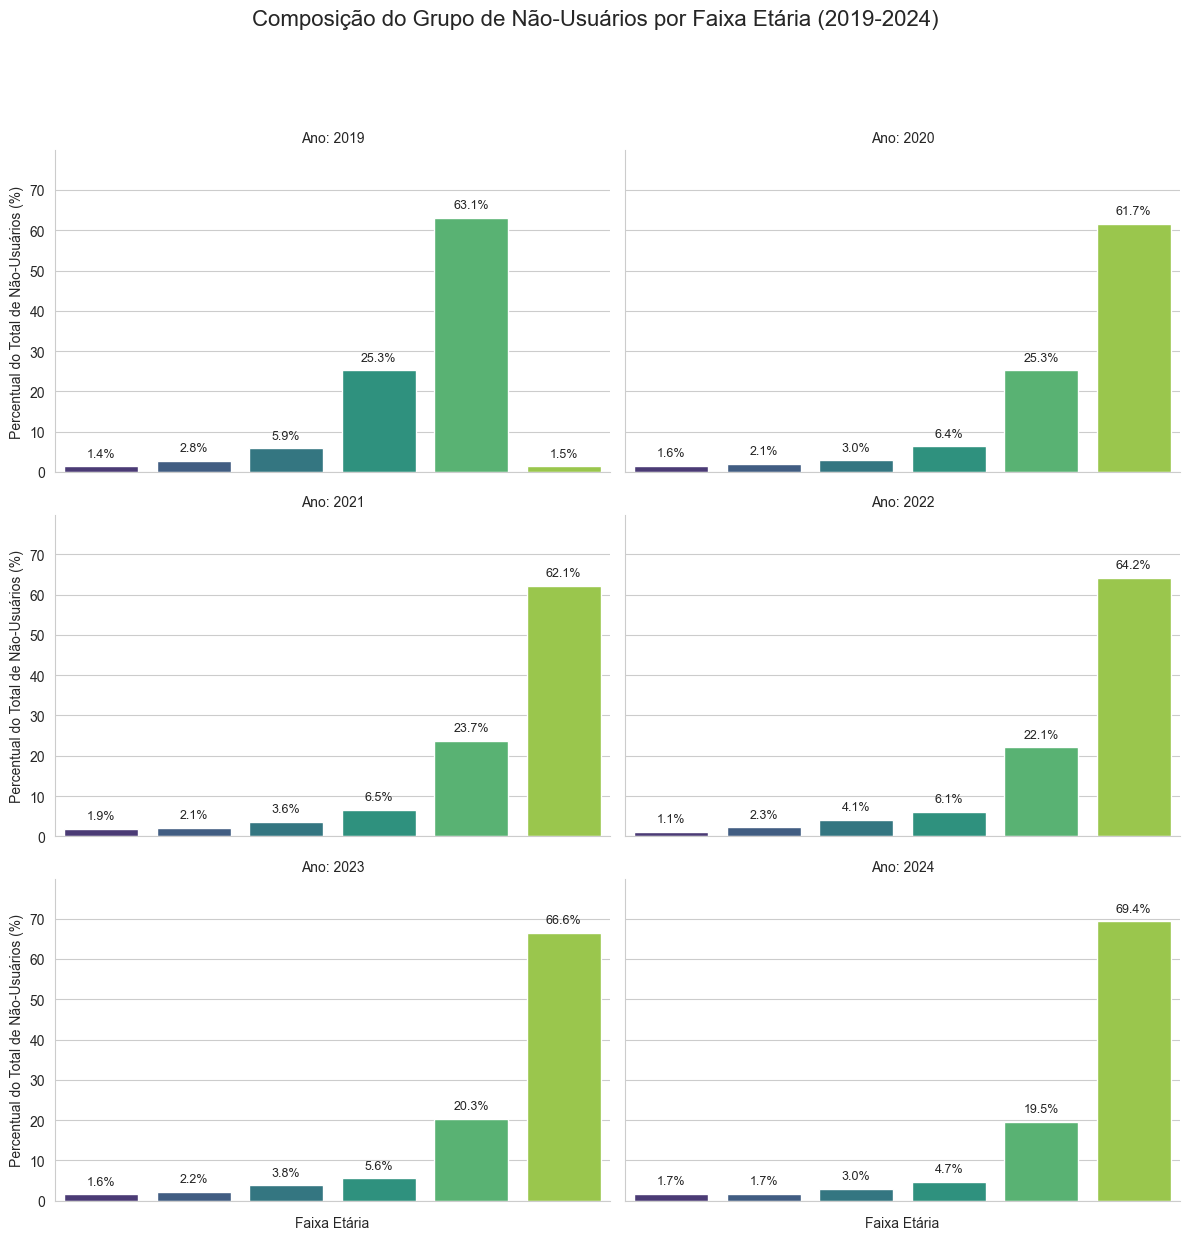

In [36]:


lista_dfs = []

# Mapeamentos de Região
faixa_etaria_map_2019 = {
    0: '60 anos ou mais', 1: '10 a 15 anos', 2: '16 a 24 anos',
    3: '25 a 34 anos', 4: '35 a 44 anos', 5: '45 a 59 anos'
}
faixa_etaria_map_padrao = {
    1: '10 a 15 anos', 2: '16 a 24 anos', 3: '25 a 34 anos',
    4: '35 a 44 anos', 5: '45 a 59 anos', 6: '60 anos ou mais'
}

# Loop para carregar e processar cada arquivo
for arquivo, ano in arquivos_anos.items():
    try:
        df_ano = pd.read_csv(arquivo, sep=';', usecols=['C1', 'FAIXA_ETARIA'])
        df_ano['Ano'] = ano
        
        # Aplicar o mapeamento correto para o ano
        if ano == 2019:
            df_ano['Faixa Etária'] = df_ano['FAIXA_ETARIA'].map(faixa_etaria_map_2019)
        else:
            df_ano['Faixa Etária'] = df_ano['FAIXA_ETARIA'].map(faixa_etaria_map_padrao)
            
        lista_dfs.append(df_ano)
        print(f"Arquivo de {ano} carregado e processado.")
    except Exception as e:
        print(f"Erro ao carregar o arquivo de {ano}: {e}")

# Concatenar todos os dataframes
df_consolidado = pd.concat(lista_dfs, ignore_index=True)

# Filtrar apenas os não-usuários (C1 == 0) e remover linhas sem faixa etária mapeada
nao_usuarios_df = df_consolidado[df_consolidado['C1'] == 0].dropna(subset=['Faixa Etária'])

# Calcular a composição percentual para cada ano
composicao_anual = nao_usuarios_df.groupby('Ano')['Faixa Etária'].value_counts(normalize=True).mul(100).rename('Porcentagem').reset_index()

print("\n--- Tabela: Composição do Grupo de Não-Usuários por Faixa Etária a cada Ano ---")
print(composicao_anual.to_string())


# --- Visualização ---
# Ordenar as categorias para o gráfico
ordem_faixa_etaria = ['10 a 15 anos', '16 a 24 anos', '25 a 34 anos', '35 a 44 anos', '45 a 59 anos', '60 anos ou mais']
composicao_anual['Faixa Etária'] = pd.Categorical(composicao_anual['Faixa Etária'], categories=ordem_faixa_etaria, ordered=True)

# Usar catplot para criar um gráfico de barras para cada ano (facet grid)
g = sns.catplot(
    data=composicao_anual,
    x='Faixa Etária',
    y='Porcentagem',
    col='Ano',
    kind='bar',
    col_wrap=2, # Quebrar a linha a cada 2 gráficos
    height=4,
    aspect=1.5,
    palette='viridis'
)

# Melhorar a formatação do gráfico
g.fig.suptitle('Composição do Grupo de Não-Usuários por Faixa Etária (2019-2024)', y=1.03, fontsize=16)
g.set_xticklabels(rotation=45, ha='right')
g.set_axis_labels("Faixa Etária", "Percentual do Total de Não-Usuários (%)")
g.set_titles("Ano: {col_name}")

# Adicionar os valores nas barras
for ax in g.axes.flatten():
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points',
                    fontsize=9)
    ax.set_ylim(0, composicao_anual['Porcentagem'].max() * 1.15)


plt.tight_layout(rect=[0, 0, 1, 0.97])

# Salvar o gráfico
plt.savefig('Imagens/composicao_anual_exclusao_por_idade.png')
print("\nGráfico da composição anual por idade salvo como 'composicao_anual_exclusao_por_idade.png'.")

A análise da composição etária dos não-usuários revela uma transição crítica no perfil da exclusão digital no Brasil. Embora o número geral de excluídos esteja caindo, o problema está se tornando menos distribuído e cada vez mais focado na população idosa. Se em 2019 a exclusão ainda afetava uma parcela de adultos de meia-idade, em 2024 ela se tornou um desafio primordialmente da terceira idade. Isso sugere que as futuras políticas de inclusão digital precisam ser ainda mais direcionadas e especializadas para atender às necessidades e barreiras específicas deste público.

### Área Urbana x Área Rural

Arquivo de 2019 carregado com sucesso.
Arquivo de 2020 carregado com sucesso.
Arquivo de 2021 carregado com sucesso.
Arquivo de 2022 carregado com sucesso.
Arquivo de 2023 carregado com sucesso.
Arquivo de 2024 carregado com sucesso.

--- Tabela: Taxa de Exclusão por Ano e Área ---
     Ano    Área  Taxa de Exclusão (%)
0   2019   Rural             43.905817
1   2019  Urbana             26.530835
2   2020   Rural             31.627057
3   2020  Urbana             11.210512
4   2021   Rural             31.649739
5   2021  Urbana             22.224144
6   2022   Rural             32.321826
7   2022  Urbana             22.049089
8   2023   Rural             30.305488
9   2023  Urbana             19.641737
10  2024   Rural             27.423335
11  2024  Urbana             17.996066

Gráfico da evolução por área salvo como 'evolucao_exclusao_por_area.png'.


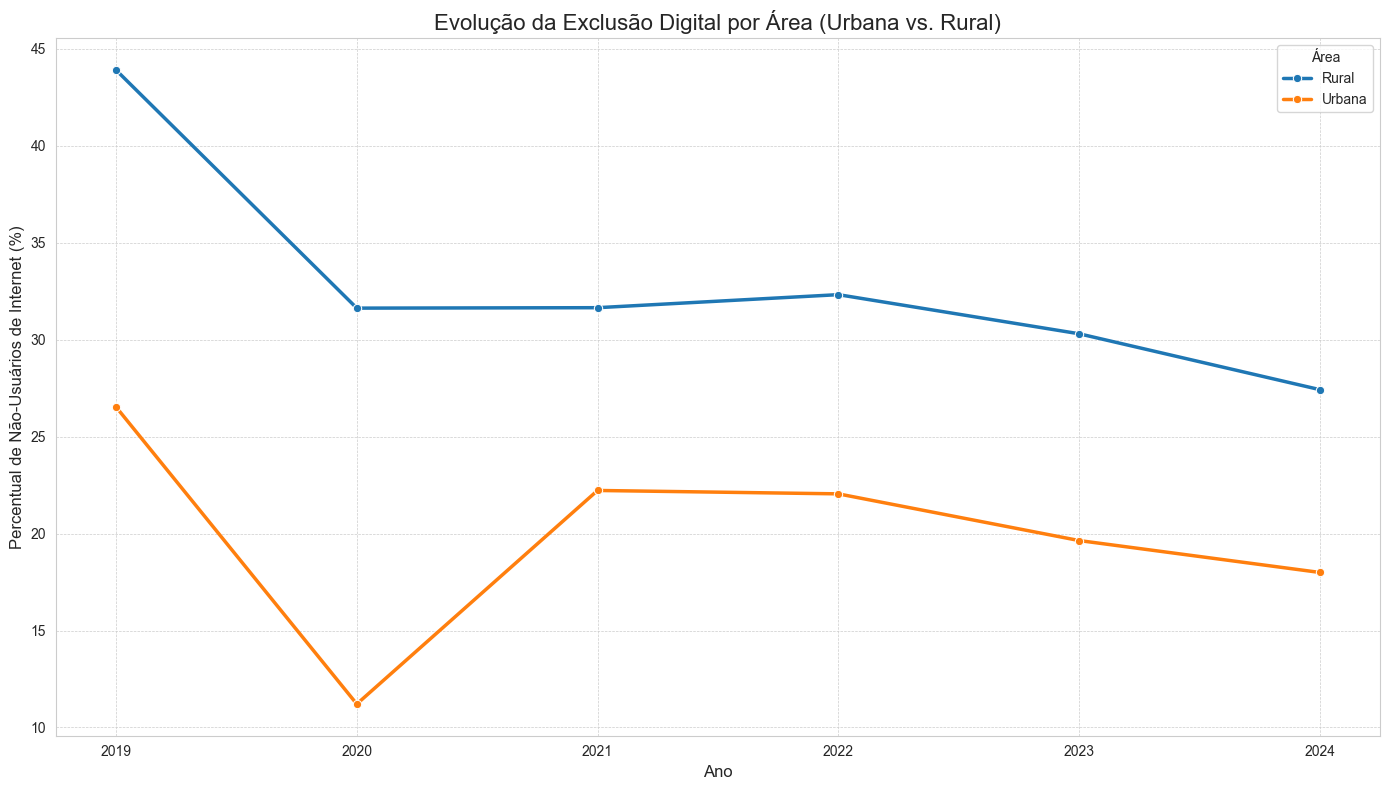

In [37]:
# Loop para carregar e processar cada arquivo
for arquivo, ano in arquivos_anos.items():
    try:
        # Selecionar as colunas de interesse
        colunas = ['C1', 'AREA']
        df_ano = pd.read_csv(arquivo, sep=';', usecols=colunas)
        
        # Adicionar a coluna 'Ano'
        df_ano['Ano'] = ano
        
        # Adicionar o dataframe processado à lista
        lista_dfs.append(df_ano)
        print(f"Arquivo de {ano} carregado com sucesso.")
    except Exception as e:
        print(f"Erro ao carregar o arquivo de {ano}: {e}")

# Concatenar todos os dataframes da lista em um só
df_consolidado = pd.concat(lista_dfs, ignore_index=True)

# Limpar os dados, mantendo apenas respostas 0 (Não) e 1 (Sim)
df_consolidado = df_consolidado[df_consolidado['C1'].isin([0, 1])]

# Mapear os códigos da AREA para rótulos legíveis
area_map = {
    1: 'Urbana',
    2: 'Rural'
}
df_consolidado['Área'] = df_consolidado['AREA'].map(area_map)

# Calcular a taxa de exclusão para cada ano e área
taxa_exclusao_area = df_consolidado.groupby(['Ano', 'Área'])['C1'].apply(
    lambda x: (x == 0).sum() / len(x) * 100
).reset_index(name='Taxa de Exclusão (%)')

print("\n--- Tabela: Taxa de Exclusão por Ano e Área ---")
print(taxa_exclusao_area.to_string())

# Gerar o gráfico de linhas múltiplas
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
sns.lineplot(data=taxa_exclusao_area, x='Ano', y='Taxa de Exclusão (%)', hue='Área', 
             marker='o', lw=2.5, palette='tab10')

plt.title('Evolução da Exclusão Digital por Área (Urbana vs. Rural)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Percentual de Não-Usuários de Internet (%)', fontsize=12)
plt.xticks(list(arquivos_anos.values()))
plt.legend(title='Área')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Salvar o gráfico
plt.savefig('Imagens/evolucao_exclusao_por_area.png')
print("\nGráfico da evolução por área salvo como 'evolucao_exclusao_por_area.png'.")

 O gráfico nos mostra que a área rural sempre demonstra mais exclusão digital do que a área urbana, consequência do ambiente e difiiculdades para implementação, apesar do gráfico de ambas demonstrar uma decadência gradual ao passar dos anos 

### Análise geral da exclusão com base na região

Dados de todos os anos carregados e padronizados.
DataFrame sem os dados de 2020 foi criado.

--- Gerando Análise: Evolução da Exclusão Digital por Região (2019-2024) ---
 ANO       Região  Taxa de Exclusão (%)
2019 Centro-Oeste             28.917700
2019     Nordeste             30.132173
2019        Norte             23.700306
2019      Sudeste             27.430601
2019          Sul             29.702048
2020 Centro-Oeste             15.448852
2020     Nordeste             14.952280
2020        Norte             15.521978
2020      Sudeste             13.184932
2020          Sul             12.114695
2021 Centro-Oeste             20.443268
2021     Nordeste             28.050297
2021        Norte             20.239316
2021      Sudeste             24.588404
2021          Sul             23.208353
2022 Centro-Oeste             22.905585
2022     Nordeste             26.716247
2022        Norte             20.063748
2022      Sudeste             25.101664
2022          Sul            

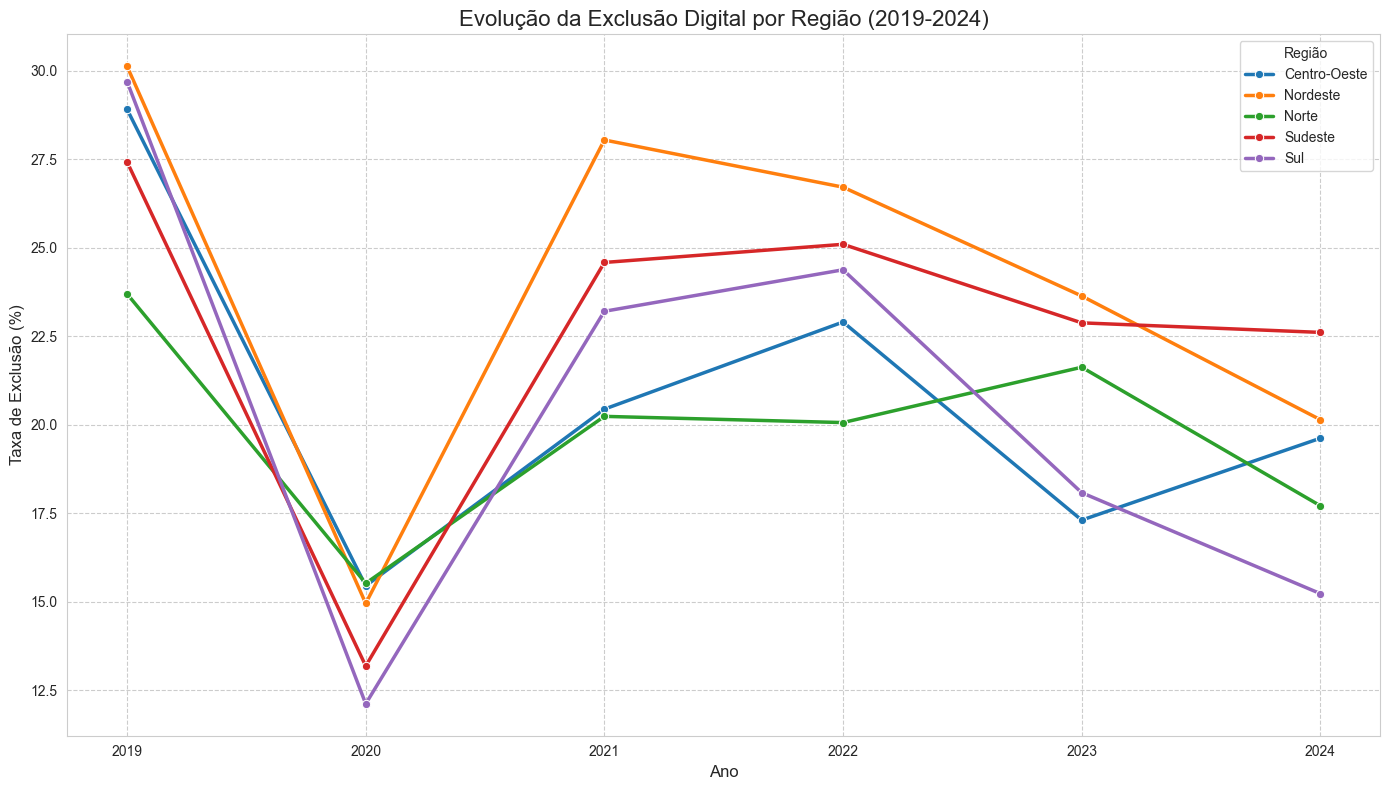


--- Gerando Análise: Evolução da Exclusão Digital por Região (sem 2020) ---
 ANO       Região  Taxa de Exclusão (%)
2019 Centro-Oeste             28.917700
2019     Nordeste             30.132173
2019        Norte             23.700306
2019      Sudeste             27.430601
2019          Sul             29.702048
2021 Centro-Oeste             20.443268
2021     Nordeste             28.050297
2021        Norte             20.239316
2021      Sudeste             24.588404
2021          Sul             23.208353
2022 Centro-Oeste             22.905585
2022     Nordeste             26.716247
2022        Norte             20.063748
2022      Sudeste             25.101664
2022          Sul             24.381800
2023 Centro-Oeste             17.307082
2023     Nordeste             23.641228
2023        Norte             21.627745
2023      Sudeste             22.881921
2023          Sul             18.082312
2024 Centro-Oeste             19.620853
2024     Nordeste             20.144967
202

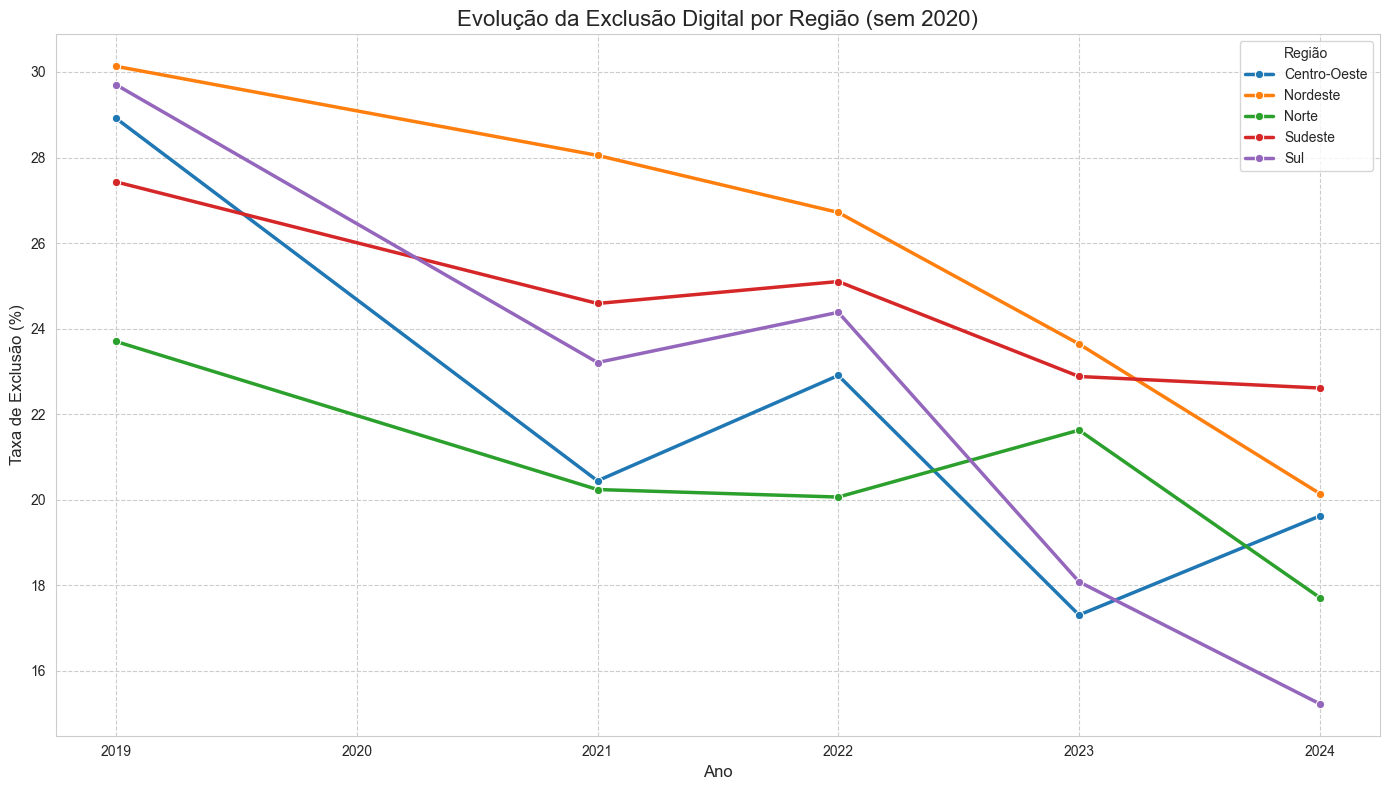

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Carregar e preparar TODOS os dados (uma única vez) ---

lista_dfs = []
for ano, arquivo in arquivos_anos_dicionario.items():
    try:
        df_ano = pd.read_csv(arquivo, sep=';', encoding='latin1', low_memory=False)
        if 'COD_REGIAO' in df_ano.columns:
            df_ano.rename(columns={'COD_REGIAO': 'COD_REGIAO_2'}, inplace=True)
        df_ano['ANO'] = ano
        lista_dfs.append(df_ano[['C1', 'COD_REGIAO_2', 'ANO']])
    except Exception as e:
        print(f"Erro ao processar o arquivo de {ano}: {e}")

df_combinado = pd.concat(lista_dfs, ignore_index=True)
regiao_map = {1: 'Sudeste', 2: 'Nordeste', 3: 'Sul', 4: 'Norte', 5: 'Centro-Oeste'}
df_combinado['Região'] = df_combinado['COD_REGIAO_2'].map(regiao_map)
print("Dados de todos os anos carregados e padronizados.")

# --- 2. Criar a versão do DataFrame SEM o ano de 2020 ---
df_combinado_sem_2020 = df_combinado[df_combinado['ANO'] != 2020].copy()
print("DataFrame sem os dados de 2020 foi criado.")

# --- 3. Definir uma função para analisar e plotar (evita repetição) ---

def analisar_e_plotar(dataframe, titulo_grafico, nome_arquivo):
    """
    Esta função calcula a taxa de exclusão e gera uma tabela e um gráfico
    para o DataFrame fornecido.
    """
    print(f"\n--- Gerando Análise: {titulo_grafico} ---")
    
    nao_usuarios = dataframe[dataframe['C1'] == 0]
    taxa = (nao_usuarios.groupby(['ANO', 'Região']).size() / 
            dataframe.groupby(['ANO', 'Região']).size()) * 100
    tabela = taxa.reset_index(name='Taxa de Exclusão (%)')
    
    print(tabela.to_string(index=False))

    plt.figure(figsize=(14, 8))
    sns.lineplot(data=tabela, x='ANO', y='Taxa de Exclusão (%)', hue='Região', marker='o', linewidth=2.5)
    plt.title(titulo_grafico, fontsize=16)
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel('Taxa de Exclusão (%)', fontsize=12)
    plt.grid(True, which='both', linestyle='--')
    plt.legend(title='Região')
    plt.tight_layout()
    plt.savefig(nome_arquivo)
    print(f"Gráfico salvo como '{nome_arquivo}'.")
    plt.show()

# --- 4. Executar a função para as duas análises ---

# Análise com todos os anos
analisar_e_plotar(df_combinado, 
                  'Evolução da Exclusão Digital por Região (2019-2024)', 
                  'Imagens/evolucao_completa.png')

# Análise sem o ano de 2020
analisar_e_plotar(df_combinado_sem_2020, 
                  'Evolução da Exclusão Digital por Região (sem 2020)', 
                  'Imagens/evolucao_sem_2020.png')

Com o passar dos anos, até mesmo as diferenças por região (o que acaba envolvendo o fincaneiro da população, uma vez que no Brasil há uma alta desigulade de renda) está diminuindo.

Ps: Foram usados dois gráficos pois o ano de 2020 possui um outlier extremo devido à troca da forma de entrevista. O primeiro gráfico foi gerado apenas para se ter conhecimento dos dados de 2020.

### Análise geral com base na faixa de renda

Carregando e preparando os dados...
AVISO: O arquivo do ano 2020 não continha as colunas necessárias e foi pulado.
DataFrame 'df_combinado' criado com sucesso.

--- Tabela: Taxa de Exclusão por Ano e Faixa de Renda (RENDA_FAMILIAR_2) ---
 ANO         Renda Familiar  Taxa de Exclusão (%)
2019               Até 1 SM             39.360097
2019  Mais de 1 SM até 2 SM             28.981297
2019  Mais de 2 SM até 3 SM             17.474048
2019  Mais de 3 SM até 5 SM             11.897590
2019 Mais de 5 SM até 10 SM              7.164790
2019          Mais de 10 SM              4.956268
2019          Não tem renda             34.000000
2021               Até 1 SM             31.768185
2021  Mais de 1 SM até 2 SM             22.195168
2021  Mais de 2 SM até 3 SM             11.815209
2021  Mais de 3 SM até 5 SM              6.819716
2021 Mais de 5 SM até 10 SM              5.793103
2021          Mais de 10 SM              4.065041
2021          Não tem renda             34.077381
2022        

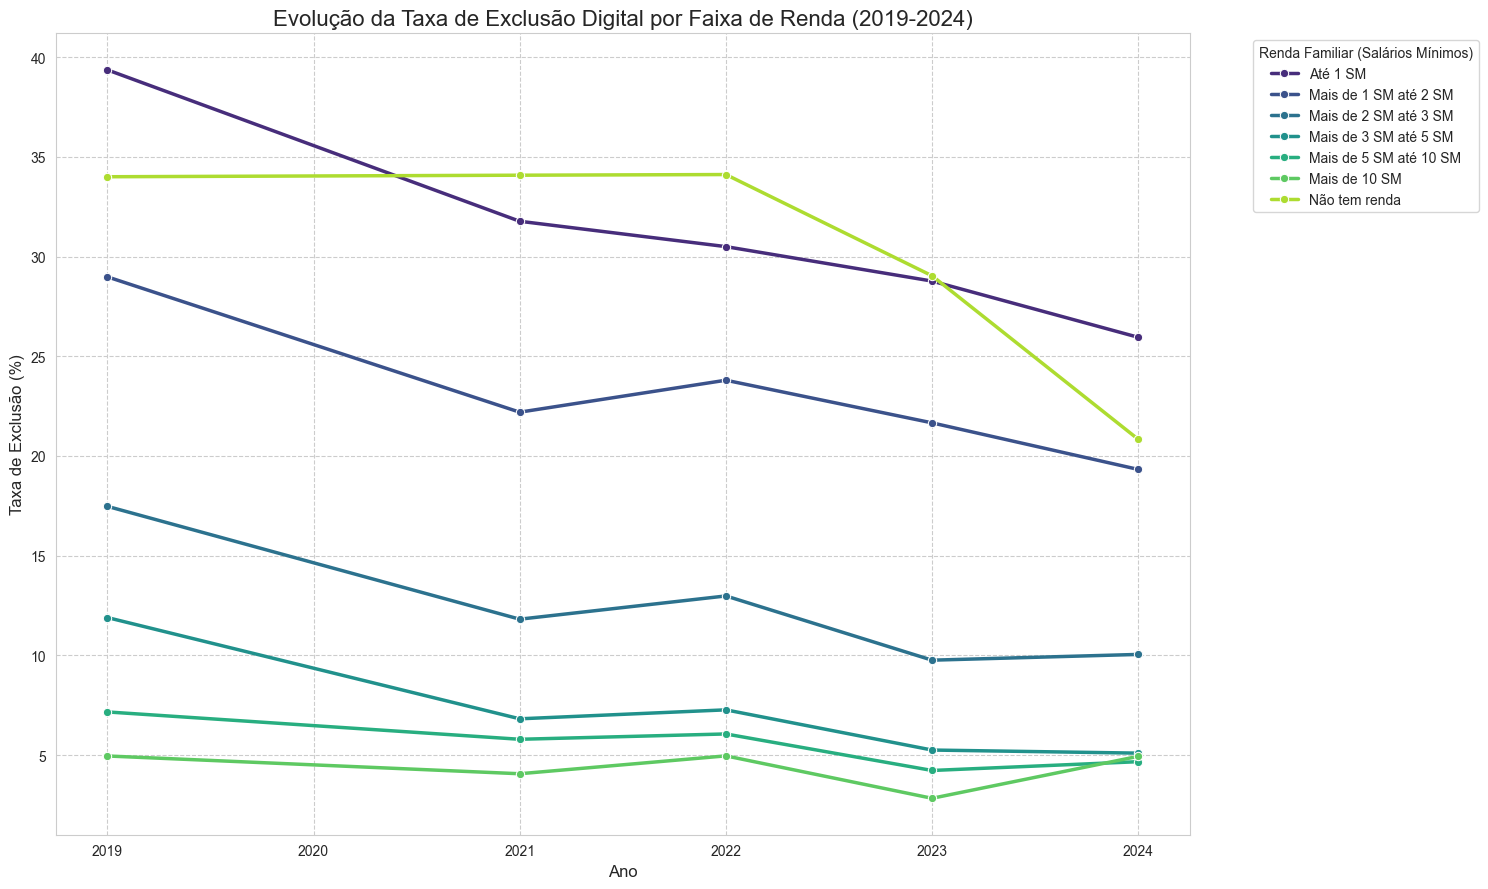

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Carregamento e Preparação dos Dados ---

# Dicionário com os nomes dos arquivos.
lista_dfs = []
# Colunas necessárias para esta análise específica
colunas_necessarias = ['C1', 'RENDA_FAMILIAR_2', 'ANO']

print("Carregando e preparando os dados...")
for ano, arquivo in arquivos_anos_dicionario.items():
    try:
        df_ano = pd.read_csv(arquivo, sep=';', encoding='latin1', low_memory=False)
        df_ano['ANO'] = ano
        lista_dfs.append(df_ano[colunas_necessarias])
    except KeyError:
        print(f"AVISO: O arquivo do ano {ano} não continha as colunas necessárias e foi pulado.")
    except Exception as e:
        print(f"Erro ao processar o arquivo de {ano}: {e}")

df_combinado = pd.concat(lista_dfs, ignore_index=True)
print("DataFrame 'df_combinado' criado com sucesso.")

# --- 2. Análise por Faixa de Renda (usando RENDA_FAMILIAR_2) ---

df_renda = df_combinado.copy()

# NOVO MAPEAMENTO, conforme fornecido por você
renda_map = {
    1: "Até 1 SM",
    2: "Mais de 1 SM até 2 SM",
    3: "Mais de 2 SM até 3 SM",
    4: "Mais de 3 SM até 5 SM",
    5: "Mais de 5 SM até 10 SM",
    6: "Mais de 10 SM",
    7: "Não tem renda"
    # Códigos 97 e 98 (Não sabe/Não respondeu) serão ignorados
}
df_renda['Renda Familiar'] = df_renda['RENDA_FAMILIAR_2'].map(renda_map)

# Remove as linhas onde a renda não foi informada
df_renda.dropna(subset=['Renda Familiar'], inplace=True)

# Filtra apenas por não-usuários (C1 == 0)
nao_usuarios_renda_df = df_renda[df_renda['C1'] == 0]

# Calcula a taxa de exclusão por ano e faixa de renda
taxa_exclusao_renda = (nao_usuarios_renda_df.groupby(['ANO', 'Renda Familiar']).size() /
                       df_renda.groupby(['ANO', 'Renda Familiar']).size()) * 100

# Prepara a tabela para visualização
tabela_renda = taxa_exclusao_renda.reset_index(name='Taxa de Exclusão (%)')

# Ordena as faixas de renda para uma melhor visualização no gráfico
ordem_renda = list(renda_map.values())
tabela_renda['Renda Familiar'] = pd.Categorical(tabela_renda['Renda Familiar'], categories=ordem_renda, ordered=True)
tabela_renda.sort_values(by=['ANO', 'Renda Familiar'], inplace=True)

print("\n--- Tabela: Taxa de Exclusão por Ano e Faixa de Renda (RENDA_FAMILIAR_2) ---")
print(tabela_renda.to_string(index=False))

# --- 3. Geração do Gráfico ---
plt.figure(figsize=(15, 9))
sns.lineplot(data=tabela_renda, x='ANO', y='Taxa de Exclusão (%)', hue='Renda Familiar', marker='o', linewidth=2.5, palette='viridis')
plt.title('Evolução da Taxa de Exclusão Digital por Faixa de Renda (2019-2024)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Taxa de Exclusão (%)', fontsize=12)
plt.grid(True, which='both', linestyle='--')
plt.legend(title='Renda Familiar (Salários Mínimos)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Imagens/evolucao_exclusao_por_renda.png')
print("\nGráfico salvo como 'evolucao_exclusao_por_renda.png'.")
plt.show()

Com base no gráfico gerado, percebemos como mesmo entre as rendas mais baixas por família, a exclusão digital está diminuindo. Portanto, percebe-se o aumento do acesso independente das classes.

Curiosamente, a idade se mostra como algo mais preocupante do que a renda familiar para a exlusão digital recentemente.

### Análise por escolaridade

Carregando e preparando os dados...
DataFrame 'df_combinado' criado com sucesso.

--- Tabela: Taxa de Exclusão por Ano e Grau de Instrução ---
 ANO            Grau de Instrução  Taxa de Exclusão (%)
2019    Analfabeto / Lê e Escreve             81.506048
2019      Fundamental I (1ª a 4ª)             76.223776
2019 Fundamental I Inc. (5ª a 8ª)             64.102564
2019         Fundamental Completo              6.359270
2019      Ensino Médio Incompleto             63.636364
2019        Ensino Médio Completo              2.717070
2019          Superior Incompleto             66.040689
2020    Analfabeto / Lê e Escreve             72.627737
2020      Fundamental I (1ª a 4ª)             52.173913
2020 Fundamental I Inc. (5ª a 8ª)             52.631579
2020         Fundamental Completo              3.222836
2020      Ensino Médio Incompleto             33.333333
2020        Ensino Médio Completo              0.321543
2020          Superior Incompleto             45.255474
2021    Analfabet

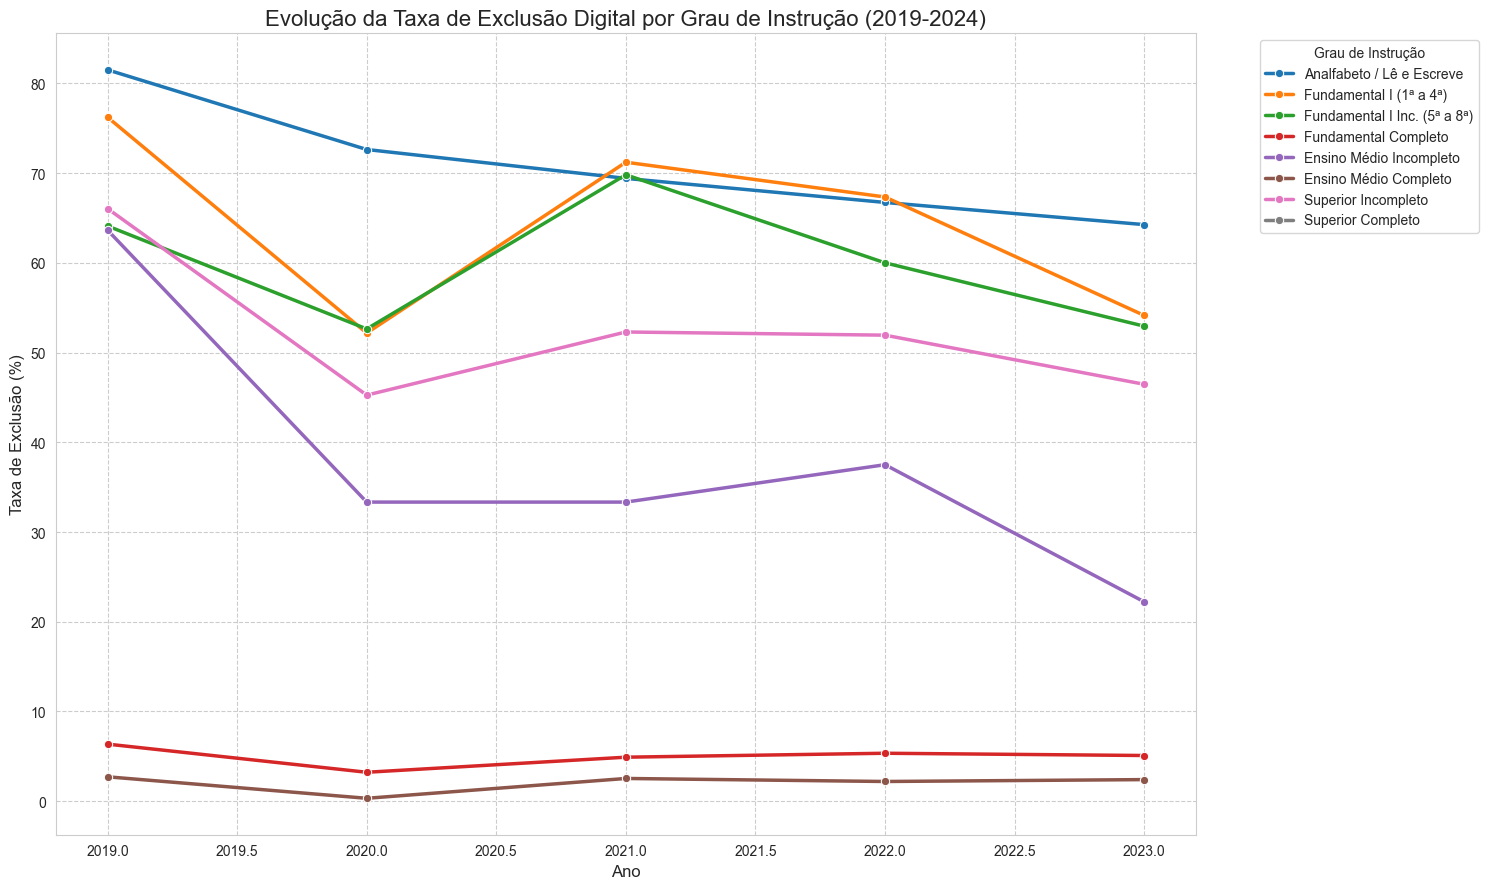

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Carregamento e Preparação dos Dados ---

lista_dfs = []
print("Carregando e preparando os dados...")
for ano, arquivo in arquivos_anos_dicionario.items():
    try:
        df_ano = pd.read_csv(arquivo, sep=';', encoding='latin1', low_memory=False)
        df_ano['ANO'] = ano
        # Adiciona apenas as colunas necessárias para a análise
        if 'GRAU_INSTRUCAO' in df_ano.columns:
            lista_dfs.append(df_ano[['C1', 'GRAU_INSTRUCAO', 'ANO']])
    except Exception as e:
        print(f"Erro ao processar o arquivo de {ano}: {e}")

df_combinado = pd.concat(lista_dfs, ignore_index=True)
print("DataFrame 'df_combinado' criado com sucesso.")


# --- 2. Análise por Grau de Instrução ---

df_escolaridade = df_combinado.copy()

grau_map = {
    1: 'Analfabeto / Lê e Escreve',
    2: 'Fundamental I (1ª a 4ª)',
    3: 'Fundamental I Inc. (5ª a 8ª)',
    10: 'Fundamental Completo',
    4: 'Ensino Médio Incompleto',
    12: 'Ensino Médio Completo',
    5: 'Superior Incompleto',
    15: 'Superior Completo'
}
df_escolaridade['Grau de Instrução'] = df_escolaridade['GRAU_INSTRUCAO'].map(grau_map)

df_escolaridade.dropna(subset=['Grau de Instrução'], inplace=True)

nao_usuarios_escolaridade_df = df_escolaridade[df_escolaridade['C1'] == 0]

taxa_exclusao_escolaridade = (nao_usuarios_escolaridade_df.groupby(['ANO', 'Grau de Instrução']).size() /
                              df_escolaridade.groupby(['ANO', 'Grau de Instrução']).size()) * 100

tabela_escolaridade = taxa_exclusao_escolaridade.reset_index(name='Taxa de Exclusão (%)')

ordem_escolaridade = [
    'Analfabeto / Lê e Escreve',
    'Fundamental I (1ª a 4ª)',
    'Fundamental I Inc. (5ª a 8ª)',
    'Fundamental Completo',
    'Ensino Médio Incompleto',
    'Ensino Médio Completo',
    'Superior Incompleto',
    'Superior Completo'
]
tabela_escolaridade['Grau de Instrução'] = pd.Categorical(tabela_escolaridade['Grau de Instrução'], categories=ordem_escolaridade, ordered=True)
tabela_escolaridade.sort_values(by=['ANO', 'Grau de Instrução'], inplace=True)

print("\n--- Tabela: Taxa de Exclusão por Ano e Grau de Instrução ---")
print(tabela_escolaridade.to_string(index=False))


# --- 3. Geração do Gráfico ---
plt.figure(figsize=(15, 9))
sns.lineplot(data=tabela_escolaridade, x='ANO', y='Taxa de Exclusão (%)', hue='Grau de Instrução', marker='o', linewidth=2.5, palette='tab10')
plt.title('Evolução da Taxa de Exclusão Digital por Grau de Instrução (2019-2024)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Taxa de Exclusão (%)', fontsize=12)
plt.grid(True, which='both', linestyle='--')
plt.legend(title='Grau de Instrução', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Imagens/evolucao_exclusao_por_escolaridade.png')
print("\nGráfico da evolução por grau de instrução salvo como 'evolucao_exclusao_por_escolaridade.png'.")
plt.show()

Ps: 2024 ficou de fora pois a variável funcina de outra forma neste ano